In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import sample

In [36]:
def distances(data):
    dist_mat = np.matrix(np.zeros((data.shape[0],data.shape[0])))
    for i in range(data.shape[0]):
         a = data - data.loc[i]
         dist_mat[i,:] = np.linalg.norm(a, axis=1)
    return dist_mat

In [37]:
def greedyk(data, k):
    dist_mat = distances(data)
    centroid = data.sample()
    while (centroid.shape[0] < k):
        next_cen_loc = np.argmax(np.min(dist_mat[:,centroid.index],axis = 1))        
        centroid = centroid.append(data.loc[next_cen_loc])
    C = np.argmin(dist_mat[:,centroid.index],axis = 1)
    ObjVal = np.max(np.min(dist_mat[:,centroid.index],axis = 1))
    return centroid, C, ObjVal

In [38]:
data = pd.read_csv(f"clustering.csv", header = None)
Q, C, price = greedyk(data, 2)

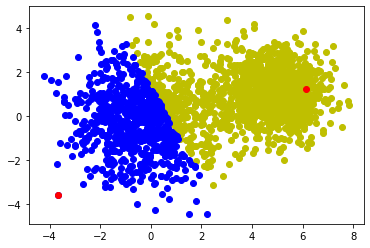

In [39]:
color = ['y', 'blue', 'green', 'cyan', 'black', 'brown']
for m in range(len(color)):
    id = []
    for i in range(len(C)):
        if (C[i] == m):
            id.append(i)
    plt.scatter(data.loc[id][0],data.loc[id][1], c = color[m])
plt.scatter(Q.loc[:][0],Q.loc[:][1], c = 'r')

In [40]:
Q

,0,1
1350,6.1422,1.2394
642,-3.6773,-3.5965


In [41]:
price

7.845884656939585

In [42]:
data1 =  pd.read_csv(f"Shape CSV.csv", header = None)
Q1, C1, price1 = greedyk(data1, 4)

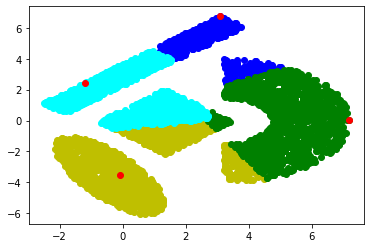

In [43]:
color = ['y', 'blue', 'green', 'cyan', 'black', 'brown']
for m in range(len(color)):
    id = []
    for i in range(len(C1)):
        if (C1[i] == m):
            id.append(i)
    plt.scatter(data1.loc[id][0],data1.loc[id][1], c = color[m])
plt.scatter(Q1.loc[:][0],Q1.loc[:][1], c = 'r')

In [44]:
Q1

,0,1
4194,-0.073609,-3.536000
2577,3.081100,6.756500
3078,7.165000,0.066071
1209,-1.177100,2.420300


In [45]:
price1

4.602372493078